In [1]:
import torch
from torch import nn
from d2l_common import Module
import matplotlib.pyplot as plt

In [2]:
def softmax(X):
    x_exp = X.exp()
    partition = x_exp.sum(1, keepdims=True)
    return x_exp / partition

x = torch.randn(10,5)
softmax(x).sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

In [3]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0,1], y]


tensor([0.1000, 0.5000])

In [4]:
from typing import Iterator
from torch.nn.parameter import Parameter
from d2l_common import Classifier


class SoftMaxRegressionScratch(Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.lr = lr
        self.sigma = sigma
        self.W = torch.normal(0, sigma, size=(
            num_inputs, num_outputs), requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self) -> Iterator[Parameter]:
        return [self.W, self.b]

    def forward(self, X):
        return softmax(X.view(-1, self.num_inputs)@self.W+self.b)

    def loss(self, y_hat, y):
        return cross_entropy(y_hat, y)

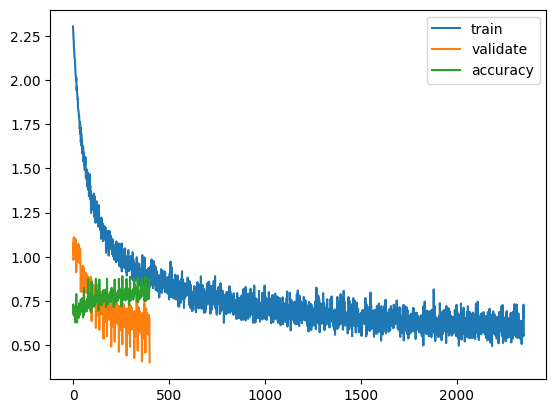

In [5]:
from d2l_common import FasionMNIST,Trainer

data = FasionMNIST(batch_size=256)
model = SoftMaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.01)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)
model.plot()



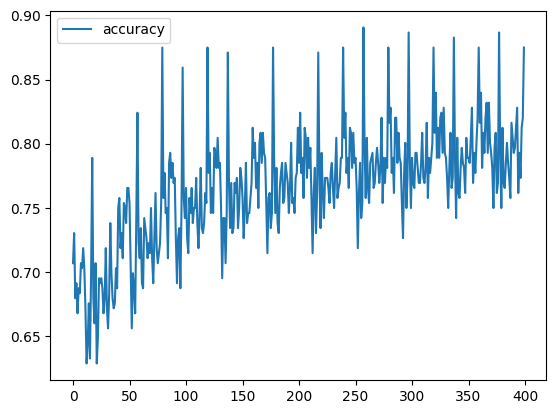

In [8]:
# plt.plot(model.train_loss, label='train')
# plt.plot(model.validate_loss, label='validate')
plt.plot(model.acc, label='accuracy')
plt.xlabel = 'epoch'
plt.ylabel = 'loss & accuracy'
plt.legend()

In [9]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

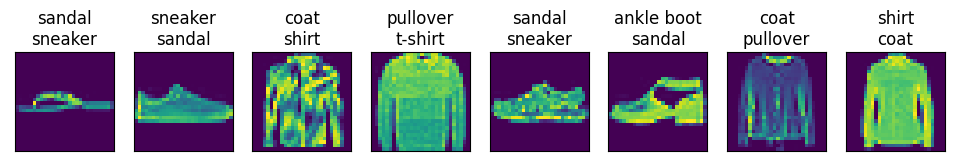

In [13]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

In [6]:
# y_hat = torch.randn(256,10)
# y = torch.arange(256)
# # print(y_hat.shape, y.shape)
# # cmp = y_hat.argmax(axis=1) == y
# # return cmp.mean() if averaged else cmp
# y_hat.shape,y.shape
# y_hat.argmax(axis=1).shape
# cmp = (y_hat.argmax(axis=1) == y).type(torch.float32)
# cmp.mean()